### Mini Project Week 12 - Kaggle Titanic Class Competition

### Titanic - Machine Learning from Disaster

### Welcome to the Week 12 quest. You will participate in the Kaggle Titanic competition and iterate on a predictive model through the week. 
This is a friendly class competition with a scoreboard reveal on Day 5.

* Competition: Kaggle Titanic: Machine Learning from Disaster
* Goal: Predict Survived for the test set and submit a CSV with PassengerId,Survived.
* Metric: Kaggle accuracy (public leaderboard uses a subset; the final ranking will rely on the private split).

In [ ]:
# Titanic mini project: whatever you do in the train you can't do it in the test
# Create a function so you don't have to keep on doing the same

In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [307]:
test_set = pd.read_csv("test.csv")

In [308]:
train_set = pd.read_csv("train.csv")

In [309]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [310]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [311]:
test_set.shape

(418, 11)

In [312]:
train_set.shape

(891, 12)

In [313]:
test_set.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [315]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [316]:
test_set.dtypes.value_counts()

object     5
int64      4
float64    2
Name: count, dtype: int64

In [317]:
train_set.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [318]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [319]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [320]:
train_set["Survived"].unique()

array([0, 1])

/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_2993/2808088691.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Survived_count = pd.value_counts(train_set['Survived'])


<Axes: xlabel='Survived'>

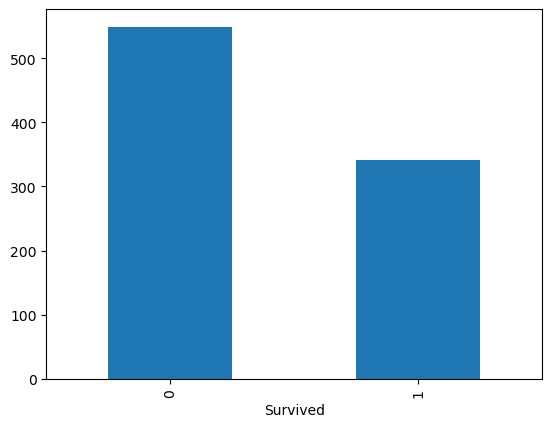

In [321]:
Survived_count = pd.value_counts(train_set['Survived'])
Survived_count.plot(kind = 'bar')

In [322]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [323]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [324]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [325]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [326]:
# Fill missing values in train_set
if "Age" in train_set.columns:
    train_set["Age"].fillna(train_set["Age"].median(), inplace=True)
    if "Fare" in train_set.columns:
        train_set["Fare"].fillna(train_set["Fare"].median(), inplace=True)
    if "Embarked" in train_set.columns:
        train_set["Embarked"].fillna(train_set["Embarked"].mode()[0], inplace=True)

/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_2993/4144476732.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set["Age"].fillna(train_set["Age"].median(), inplace=True)
/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_2993/4144476732.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [327]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Feature Selection for Numerical Columns

In [328]:
# Numerical features (int, float)
numerical_columns = train_set.select_dtypes(include=["int64", "float64"])

# Categorical features (object, category, bool)
categorical_columns = train_set.select_dtypes(include=["object", "category", "bool"])

print("Numerical columns:", numerical_columns.columns)
print("Categorical columns:", categorical_columns.columns)


Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


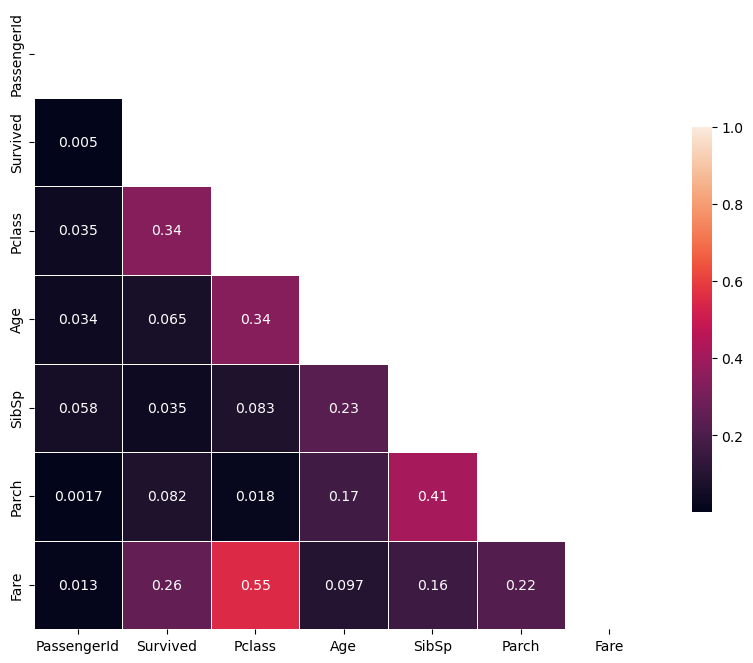

In [329]:
import seaborn as sns

corr=np.abs(numerical_columns.corr()) 

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [330]:
numerical_columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [331]:
# Drop PassengerId and SibSp as low correlation with the target survived
numerical_columns = numerical_columns.drop(["PassengerId", "SibSp"], axis=1,)
numerical_columns

,Survived,Pclass,Age,Parch,Fare
0,0,3,22.0,0,7.2500
1,1,1,38.0,0,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,0,53.1000
4,0,3,35.0,0,8.0500
...,...,...,...,...,...
886,0,2,27.0,0,13.0000
887,1,1,19.0,0,30.0000
888,0,3,28.0,2,23.4500
889,1,1,26.0,0,30.0000


### Feature Selection for Categorical Columns: One Hot Encoding dummys

In [148]:
# Drop: Name, Ticket, Cabin
# Encode: Sex - Label Encode (0 = male, 1 = female) or One-hot
# Embarked - One-hot Encode (Embarked_C, Embarked_Q, Embarked_S)

In [332]:
categorical_columns

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [333]:
categorical_columns = categorical_columns.drop(["Name", "Ticket", "Cabin"], axis=1)
categorical_columns

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [334]:
categorical_columns = pd.get_dummies(categorical_columns, drop_first=False, dtype=int)
categorical_columns

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [335]:
train_set = pd.concat([numerical_columns, categorical_columns], axis=1)
train_set

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,0,7.2500,0,1,0,0,1
1,1,1,38.0,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,7.9250,1,0,0,0,1
3,1,1,35.0,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,30.0000,1,0,0,0,1
888,0,3,28.0,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,30.0000,0,1,1,0,0


# Test Set

In [336]:
# Numerical features (int, float)
numerical_columns = test_set.select_dtypes(include=["int64", "float64"])

# Categorical features (object, category, bool)
categorical_columns = test_set.select_dtypes(include=["object", "category", "bool"])

print("Numerical columns:", numerical_columns.columns)
print("Categorical columns:", categorical_columns.columns)


Numerical columns: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


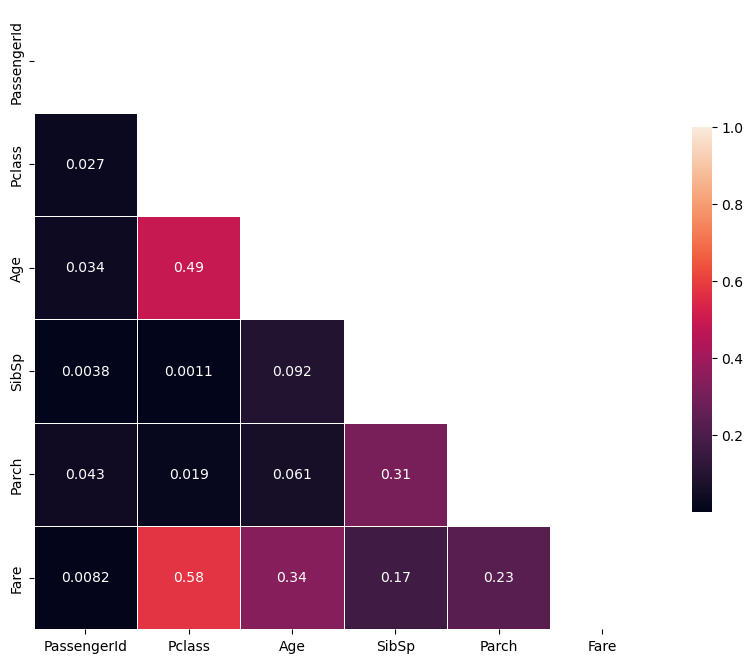

In [337]:
import seaborn as sns

corr=np.abs(numerical_columns.corr()) 

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Feature Selection for Categorical Columns: One Hot Encoding dummys

In [338]:
categorical_columns = categorical_columns.drop(["Name", "Ticket", "Cabin"], axis=1)
categorical_columns

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [339]:
categorical_columns = pd.get_dummies(categorical_columns, drop_first=False, dtype=int)
categorical_columns

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
413,0,1,0,0,1
414,1,0,1,0,0
415,0,1,0,0,1
416,0,1,0,0,1


In [340]:
test_set = pd.concat([numerical_columns, categorical_columns], axis=1)
test_set

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,NaN,0,0,8.0500,0,1,0,0,1


In [341]:
# Fill missing values in test_set
if "Age" in test_set.columns:
    test_set["Age"].fillna(test_set["Age"].median(), inplace=True)
    if "Fare" in test_set.columns:
        test_set["Fare"].fillna(test_set["Fare"].median(), inplace=True)
    if "Embarked" in test_set.columns:
        test_set["Embarked"].fillna(test_set["Embarked"].mode()[0], inplace=True)

/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_2993/3281188925.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_set["Age"].fillna(test_set["Age"].median(), inplace=True)
/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_2993/3281188925.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [342]:
# Drop PassengerId and SibSp as low correlation with the target survived
numerical_columns = numerical_columns.drop(["PassengerId", "SibSp"], axis=1,)
numerical_columns

,Pclass,Age,Parch,Fare
0,3,34.5,0,7.8292
1,3,47.0,0,7.0000
2,2,62.0,0,9.6875
3,3,27.0,0,8.6625
4,3,22.0,1,12.2875
...,...,...,...,...
413,3,NaN,0,8.0500
414,1,39.0,0,108.9000
415,3,38.5,0,7.2500
416,3,NaN,0,8.0500


### Split

In [343]:
X = train_set.drop('Survived',axis = 1)
y = train_set['Survived']

In [344]:
X.isna().sum()

Pclass        0
Age           0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [345]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42) 

In [163]:
# Starting with Logistic Regression because survival prediction is a binary classification problem, and Logistic Regression is simple, fast, and interpretable. 
# It provides a strong baseline to evaluate preprocessing and feature engineering. 
# Once this baseline is established, we can compare it against more complex models like Decision Trees, Random Forests, or Gradient Boosting to see if performance improves.

### Logistic Regression

In [ ]:
# Do the same from here for all the different models with hyperparameters etc.

In [118]:
lr=LogisticRegression()

In [119]:
lr.fit(X_train,y_train) 

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
lr.score(X_test, y_test)

0.8222222222222222

In [121]:
test_pred = lr.predict(test_set.drop(["PassengerId", "SibSp"], axis=1))
test_set["Survived"] = test_pred
test_set = test_set[["PassengerId", 'Survived']]
test_set.set_index('PassengerId', inplace = True)

In [76]:
test_set

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [62]:
test_set.to_csv('test_set.csv')

# KNeighborsClassifier

In [165]:
knn = KNeighborsClassifier()

In [166]:
knn

KNeighborsClassifier()

In [167]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [168]:
knn.score(X_test, y_test)

0.7222222222222222

In [169]:
test_set

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,27.0,0,0,8.0500,0,1,0,0,1


In [170]:
test_pred = knn.predict(test_set.drop(["PassengerId", "SibSp"], axis=1))
test_set["Survived"] = test_pred
test_set = test_set[["PassengerId", 'Survived']]
test_set.set_index('PassengerId', inplace = True)

In [171]:
test_set

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [172]:
test_set.to_csv('test_set2.csv')

In [222]:
knn = KNeighborsClassifier(3)

In [223]:
knn

KNeighborsClassifier(n_neighbors=3)

In [224]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [225]:
knn.score(X_test, y_test)

0.7333333333333333

In [226]:
test_set

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,27.0,0,0,8.0500,0,1,0,0,1


In [227]:
test_pred = knn.predict(test_set.drop(["PassengerId", "SibSp"], axis=1))
test_set["Survived"] = test_pred
test_set = test_set[["PassengerId", 'Survived']]
test_set.set_index('PassengerId', inplace = True)

In [228]:
test_set

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,0
...,...
1305,1
1306,1
1307,0


In [229]:
test_set.to_csv('test_set3.csv')

# Decision Tree Classifier

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [290]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [291]:
dt = DecisionTreeClassifier(max_depth = 5, random_state=42)

In [292]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

TypeError: can only concatenate str (not "numpy.int64") to str

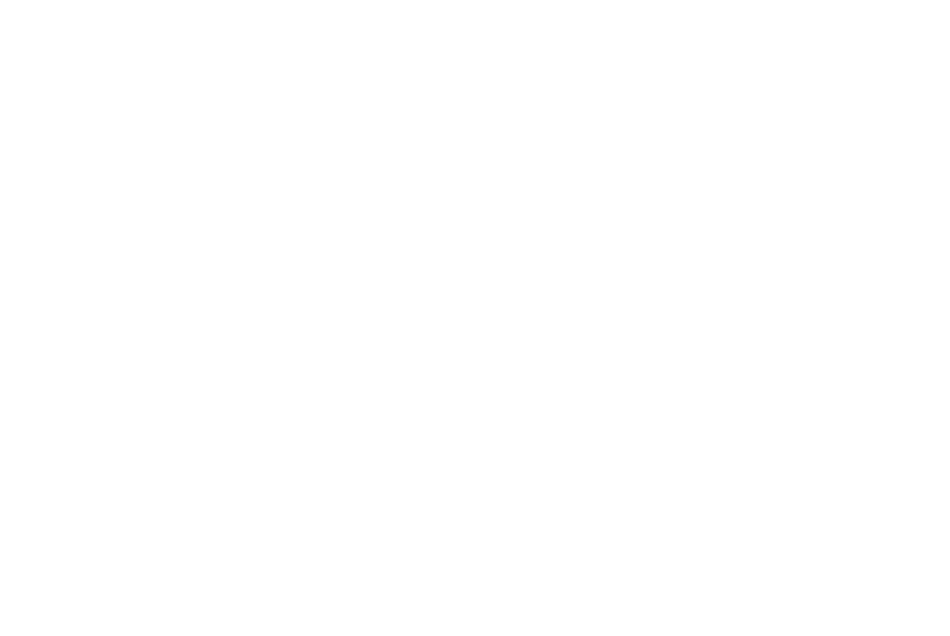

In [293]:
plt.figure(figsize=(12,8))
plot_tree(
    dt,
    feature_names = X_train.columns,
    class_names = y_train.unique(),
    filled=True,
    rounded=True,
    impurity=True,
)
plt.tight_layout()
plt.show()

In [294]:
dt.score(X_test, y_test)

0.7988826815642458

In [295]:
test_set

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,27.0,0,0,8.0500,0,1,0,0,1


In [296]:
test_pred = knn.predict(test_set.drop(["PassengerId", "SibSp"], axis=1))
test_set["Survived"] = test_pred
test_set = test_set[["PassengerId", 'Survived']]
test_set.set_index('PassengerId', inplace = True)

In [297]:
test_set

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,0
...,...
1305,1
1306,1
1307,0


In [298]:
test_set.to_csv('test_set4.csv')

# Logistic Regression Scaled

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [347]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on training set
X_test_scaled = scaler.transform(X_test)        # transform test set

In [348]:
lr=LogisticRegression()

In [349]:
lr.fit(X_train_scaled,y_train) 

LogisticRegression()

In [350]:
lr.score(X_test_scaled, y_test)

0.8333333333333334

In [351]:
test_pred = lr.predict(test_set.drop(["PassengerId", "SibSp"], axis=1))
test_set["Survived"] = test_pred
test_set = test_set[["PassengerId", 'Survived']]
test_set.set_index('PassengerId', inplace = True)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [352]:
test_set

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,0
1307,0


In [353]:
test_set.to_csv('test_set5.csv')

# KNeighborsClassifier Scaled

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on training set
X_test_scaled = scaler.transform(X_test)        # transform test set

In [53]:
# 1. Preprocessing function
def preprocess_titanic(df, is_train=True):
    """
    Preprocess Titanic dataset.
    - Drops unused columns (Name, Ticket, Cabin)
    - Fills missing values (Age, Fare, Embarked)
    - Encodes categorical variables (Sex, Embarked)
    
    Args:
        df (pd.DataFrame): Input dataframe (train or test)
        is_train (bool): If True, keeps Survived column
    
    Returns:
        pd.DataFrame: Cleaned dataframe
    """
    df = df.copy()
    
    # Drop columns not useful for ML (keep PassengerId for submission)
    drop_cols = ["Name", "Ticket", "Cabin"]
    df.drop(columns=drop_cols, inplace=True, errors="ignore")
    
    # Fill missing values
    if "Age" in df.columns:
        df["Age"].fillna(df["Age"].median(), inplace=True)
    if "Fare" in df.columns:
        df["Fare"].fillna(df["Fare"].median(), inplace=True)
    if "Embarked" in df.columns:
        df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    
    # Encode categorical features
    if "Sex" in df.columns:
        df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
    if "Embarked" in df.columns:
        df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])
    
    return df


# -----------------------------
# Use your existing dataframes
# -----------------------------
# Preprocess both
train_clean = preprocess_titanic(train_set, is_train=True)
test_clean = preprocess_titanic(test_set, is_train=False)


# -----------------------------
# Split features and target
# -----------------------------
X = train_clean.drop(columns=["Survived", "PassengerId"])
y = train_clean["Survived"]

# Keep passenger IDs for submission
test_passenger_ids = test_clean["PassengerId"]
X_test_final = test_clean.drop(columns=["PassengerId"])

# Train/validation split (for evaluation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# -----------------------------
# Train Logistic Regression
# -----------------------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Validation performance
y_val_pred = logreg.predict(X_val)
y_val_prob = logreg.predict_proba(X_val)[:, 1]

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation ROC AUC:", roc_auc_score(y_val, y_val_prob))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


# -----------------------------
# Predict on test set for Kaggle
# -----------------------------
test_preds = logreg.predict(X_test_final)

submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": test_preds
})

# Save submission file
submission.to_csv("submission.csv", index=False)
print("\n✅ Submission file saved as submission.csv")


Validation Accuracy: 0.8044692737430168
Validation ROC AUC: 0.8519104084321476

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


✅ Submission file saved as submission.csv


/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_91088/1004559643.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/var/folders/t7/2831gjdd1sj_3_zl1rly62n00000gn/T/ipykernel_91088/1004559643.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 